# Linear Regression Example 

importing all the libaries

In [79]:

import pandas as pd

Contruct Dataframe

In [80]:
df = pd.read_csv('OmniPower.csv')
df.head()

,Sales,Price,Promotion
0,4141,59,200
1,3842,59,200
2,3056,59,200
3,3519,59,200
4,4226,59,400


In [81]:
from sklearn.model_selection import train_test_split

x = df[['Price', 'Promotion']]  #must use double brackets to select df, becuz multiple col
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print("x_train: \n {}\n y_train: \n{}".format(x_train.head(), y_train.head()))

x_train: 
     Price  Promotion
12     79        200
32     99        600
9      59        600
0      59        200
4      59        400
 y_train: 
12    1916
32    3354
9     5120
0     4141
4     4226
Name: Sales, dtype: int64


In [82]:
print(x_train.shape)
print(y_train.shape)

(27, 2)
(27,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(x_train, y_train)

model.intercept_
model.coef_

array([-54.58053157,   3.91694414])

PREDICTION

In [84]:
#predicts on test data
y_pred = model.predict(x_test) #x_test and y_pred must be same length

#single value predict
print(model.predict([[79,200]]))

[2201.5577442]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
y_pred

array([2201.5577442 , 2984.94657312, 1109.94711279, 1109.94711279,
       4859.94603346, 1109.94711279, 3768.33540205])

VALIDATE

In [86]:
print(model.coef_) #slope
print(model.intercept_) #intercept
print(model.score(x_train, y_train))

[-54.58053157   3.91694414]
5730.030909336212
0.7537482665837636


R2 score

In [87]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) #compare test with predicted values
print("Test R2_score:", r2)

Test R2_score: 0.7358802563295198


VISUALISE

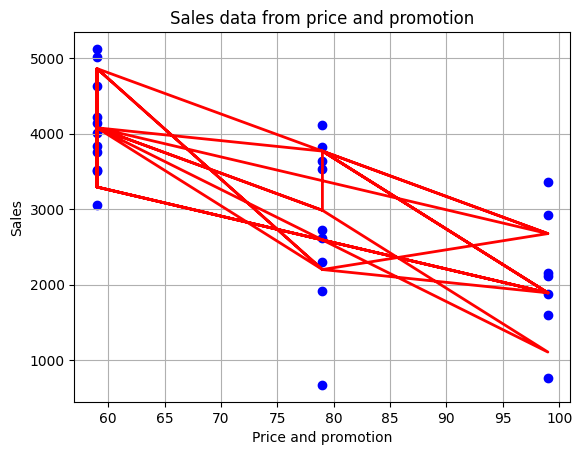

In [89]:
import matplotlib.pyplot as plt
#cant plot 2 features at same time
# predict on training data
y_pred_train = model.predict(x_train)  
plt.scatter(x_train.iloc[:,0], y_train, color = 'blue', label='Data points') #[:,0] selects price vs sales, all rows, col price
plt.plot(x_train.iloc[:,0], y_pred_train, color='red', lw=2, label = 'Regression Line')  #iloc is for DF
plt.title('Sales data from price and promotion')
plt.xlabel('Price and promotion')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

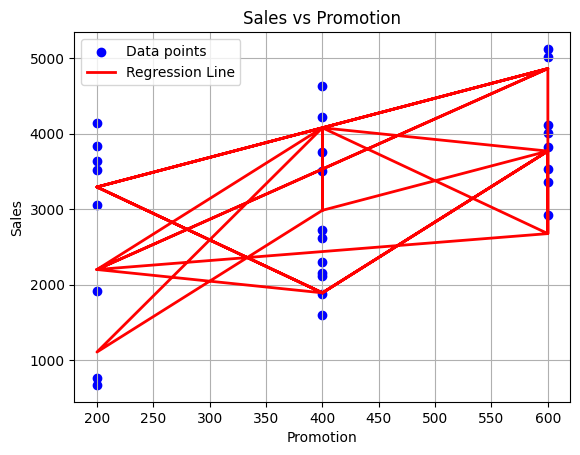

In [93]:
plt.scatter(x_train['Promotion'], y_train, color='blue', label='Data points')  # Scatter plot
plt.plot(x_train['Promotion'], y_pred_train, color='red', lw=2, label='Regression Line')  # Regression line
plt.title('Sales vs Promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()